In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
from datetime import date
import calendar
import numpy as np
from math import pi
from bokeh.io import show, output_file, output_notebook, reset_output
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line
from bokeh.transform import cumsum
from bokeh.core.properties import value
from bokeh.palettes import Category20
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
import re
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# numeros totales

#palabras promedio por mensaje por usuario
# palabras mas comunes del grupo por año
# palabras mas comunes por usuario




### Import de csv from whatsapp - data formatting

In [ ]:
#read del csv exportado del whatsapp group deseado
#contiene un string por mensaje enviado con información de fecha, usuario y texto

with open('whatsap-group-chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  
len(sentences)

In [94]:
# producimos y guardamos el DataFrame.
# columnas [user, date, text]

df = pd.DataFrame()
for i in range(1,len(sentences)-1):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)
export_csv = df.to_csv (r'chats-data')


In [57]:
df = pd.read_csv('chats-data') 

In [58]:
#drop de registros con datos nulos

print(df.shape,' tamaño antes de dropear')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear')

(133500, 4)  tamaño antes de dropear
(126147, 4)  tamaño despues de dropear


In [59]:
#convierte la columna date a formato DateTime
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M', errors='coerce')

#crea nuevas columnas en base a datos de fecha

df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date
df['date4'] = df.date.dt.strftime('%m-%Y')
df['weekdaynr'] = df.date.dt.weekday
    
    
    
#dropeamos registros incompletos posterior a la conversión datetime

print(df.shape,' tamaño antes de dropear excepciones coerce / NaT values')
df = df.dropna(axis=0, how='any') # tira las filas que tienen al menos un registro NaN/NaT 
print(df.shape,' tamaño despues de dropear expepciones coerce / NaT values')
df.sample(3)


(126147, 11)  tamaño antes de dropear excepciones coerce / NaT values
(126143, 11)  tamaño despues de dropear expepciones coerce / NaT values


,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4
27925,27925,2017-01-12 02:36:00,Don Julio 70,Oguitoo,2.0,2017.0,1.0,3.0,2.0,2017-01-12,01-2017
6116,6116,2016-05-19 16:54:00,Ambas,Pon Cl,20.0,2016.0,5.0,3.0,16.0,2016-05-19,05-2016
91291,91291,2018-10-05 10:05:00,<Multimedia omitido>,Muse Cell,40.0,2018.0,10.0,4.0,10.0,2018-10-05,10-2018


In [60]:
df['weekdaynr'] = df.date.dt.weekday

#creamos la columna weekday acorde al dia de la semana

weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])


### DataFrame - sample

In [61]:
df.sample(5)

,Unnamed: 0,date,text,user,week,year,month,weekdaynr,hour,date3,date4,weekday
12718,12718,2016-08-14 07:20:00,Como la están pasando og,URI,32.0,2016.0,8.0,6,7.0,2016-08-14,08-2016,Domingo
128936,128936,2019-10-23 11:47:00,<Multimedia omitido>,Shafal,43.0,2019.0,10.0,2,11.0,2019-10-23,10-2019,Miercoles
77213,77213,2018-05-23 18:54:00,Si moda sube subo,Sebi Cell,21.0,2018.0,5.0,2,18.0,2018-05-23,05-2018,Miercoles
46719,46719,2017-06-28 10:03:00,Yo mande la versión de cfk hace unos días eh,Fede Sharley,26.0,2017.0,6.0,2,10.0,2017-06-28,06-2017,Miercoles
85817,85817,2018-08-15 08:56:00,Ya mañana debería estar mejor. En dos días se ...,Muse Cell,33.0,2018.0,8.0,2,8.0,2018-08-15,08-2018,Miercoles


# --- Data Analytics  ---

### lineplot - mensajes por día 

Cantidad de mensajes totales del grupo estudiados: 126143
Cantidad de mensajes promedio por dia: 95.99923896499239
top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64


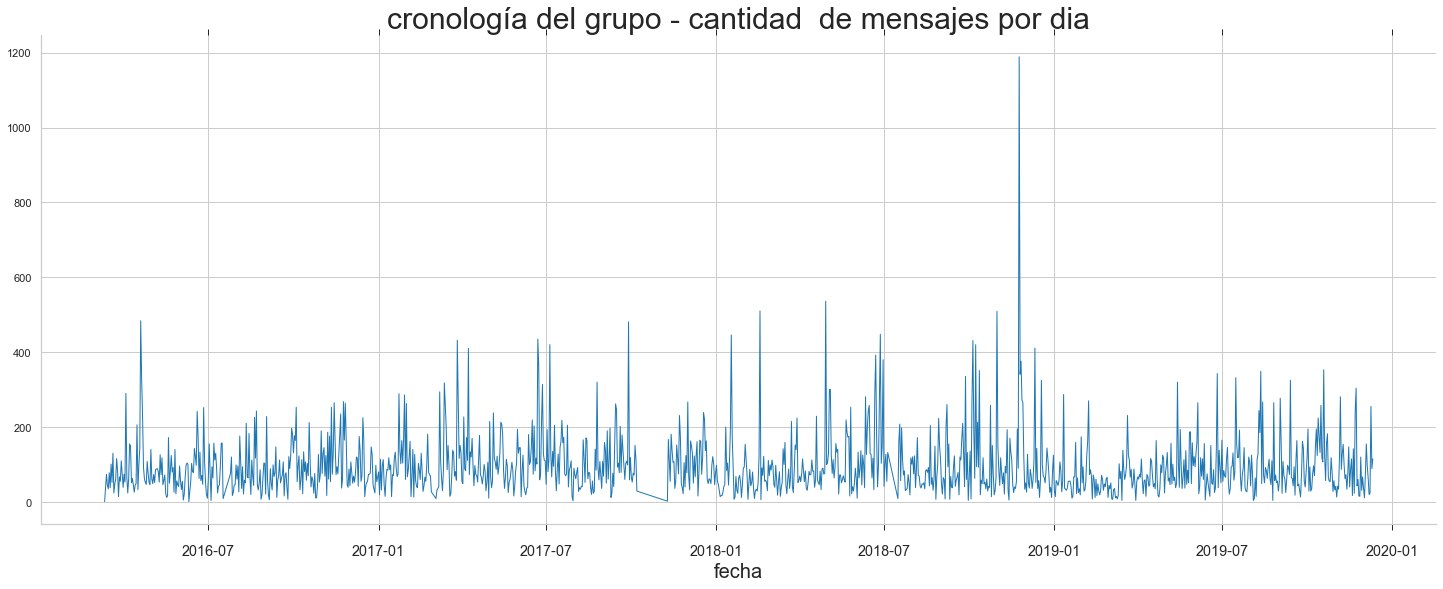

In [62]:
# agrupamos datos por día en un dataframe y producimos un lineplot

df_graph1 = df.groupby('date3').count()

a4_dims = (25, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.set(style="white")

plt.xlabel('fecha', fontsize=20)
x = df_graph1.index
y = df_graph1.text

ax.tick_params(axis='x',pad=15,labelsize='large', reset=True, gridOn=True ,width=1)
dates = df['date4']

data = df_graph1.text
datamean = data.rolling(5).mean()
sns.despine()
plt.title('cronología del grupo - cantidad  de mensajes por dia', fontsize=30)

sns.lineplot(data=[data], palette="tab10", linewidth=1, legend=False)
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])



In [63]:
#sample del día con mayor actividad del grupo

top_chat_day = df_graph1.date.sort_values(ascending=False).index[0]

print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)

15 mensajes random del dia mas activo del grupo: 2018-11-24


97367                        Y mañana les rompemos el orto
97243                                  Devolveme mi sábado
97235                                        Vot 1 segueja
96876                                 <Multimedia omitido>
96982                                                   ☝🏻
97590    vos te pensás que boca no mete bengalas en nenes?
97785                                   Y ustedes festejen
97603                        pero lo mismo es la apedreada
97684    Y para vos es lo mismo que un tipo que tira ga...
96863                           Acá me sale el facho total
96729                              pero lastimosamente, no
96924    Te tiras un pedo y estás filmado y esto no se ve?
96916                yo no creo que eso solucione una goma
97427                   no dejó que lo revisen los médicos
97247                                  Que manga de forros
Name: text, dtype: object


### lineplot - comportamiento por horas por año

tomando el comportamiento del último año
hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje -- 12.0 hs
hora del día con menor actividad para decir algo y pasar desapercibido -- 5.0 hs


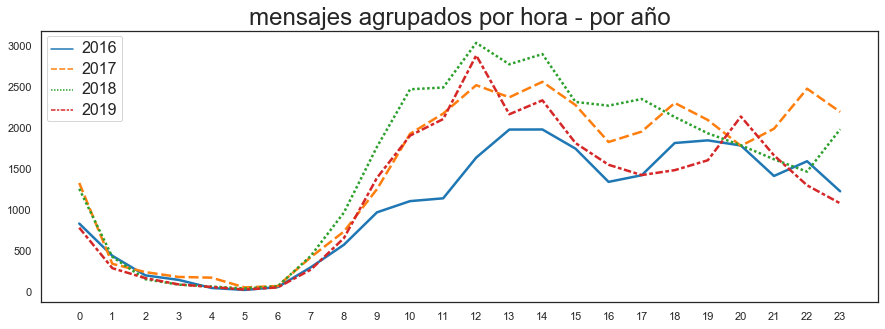

In [64]:
#producimos el grupo de datos agrupados por hora del dia por año para estudiar el comportamiento 
#por hora del grupo

years_lists = df.year.unique()
df_graph2 = pd.DataFrame()

for i in years_lists:
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text.transpose()#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True)
    
df_graph2.index = years_lists
df_graph2.index = df_graph2.index.astype('int') 



a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)

plt.title('mensajes agrupados por hora - por año', fontsize=24)
sns.set()


sns.set(style="whitegrid")
data = df_graph2.transpose()
sns.lineplot(data=data, palette="tab10", linewidth=2.5, legend="full")
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text

ax.set_xticks(sorted(df.hour.unique()))

ultimo_año_msg_x_hora = data[data.columns[-1]]
print('tomando el comportamiento del último año')
print('hora del día con mayor actividad para mejorar tu probabilidad de lectura de tu mensaje --',ultimo_año_msg_x_hora.idxmax(),'hs') 
print('hora del día con menor actividad para decir algo y pasar desapercibido --',ultimo_año_msg_x_hora.idxmin(),'hs')

In [65]:
#agrupamos datos para estudiar gráfico de actividad por usuario por año-

df_graph3 = df[['year','user','text']].groupby(['year','user']).count()
df_graph3 = df_graph3.sort_values(by=['year','text'], ascending=[False,False])
df_grpah_unstacked = df_graph3.unstack().transpose()
df_grpah_unstacked.index = [i[1] for i in df_grpah_unstacked.index]
df_grpah_unstacked = df_grpah_unstacked.fillna(0)

dict1 = {'years' : df_grpah_unstacked.columns.values.tolist()}
indexlist = list( map(str, df_grpah_unstacked.index))
dict2 = dict(zip(indexlist,df_grpah_unstacked.values.tolist()))
dict1.update(dict2)


a = Category20[20]
b = Category20[20]

colorrr = a + b
users = [df_grpah_unstacked.index.values]

### stacked graph - actividad por usuario por año

In [66]:
reset_output()
output_file("msg_user_year_stackedgraph.html")


years = [df_grpah_unstacked.columns.values]
users = [df_grpah_unstacked.index.values]
colors = colorrr[0:len(df_grpah_unstacked.index)]

data = dict1


users = list( map(str, df_grpah_unstacked.index))

p = figure(plot_height=500,plot_width=800, title="Mensajes por año",
           toolbar_location="right", tools="wheel_zoom,pan,hover,box_select,reset,save", tooltips="$name @$name")#, x_range=years)

p.vbar_stack(users, x='years', width=0.6, source=data, color=colors)# legend=value(users))



p.title.text_font_size = '15pt'
p.y_range.start = 0
p.x_range.range_padding = 0.5
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)


### mensajes multimedia

In [67]:
multimedia_msgs = df.loc[df['text'] == '<Multimedia omitido>'].groupby('user').count().sort_values('date', ascending=[False])
multimedia_msgs = multimedia_msgs.text

print('los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria')
multimedia_msgs[0:3]


los tres miembros del grupo que mas mensajes multimedia envian al grupo y deberias conversar para ahorrar en tarjetas de memoria


user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64

### Pie chart - participación por usuario total

In [68]:
reset_output()
output_file("msg_user_piegraph.html")

colors = colorrr[0:len(multimedia_msgs.index)]

data = pd.Series(multimedia_msgs).reset_index(name='value').rename(columns={'index':'usuario'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = colors
data = data.sort_values(by=['value'], ascending=[False])
p = figure(toolbar_location="right", plot_height=350, title="Mensajes multimedia enviados", 
           tools="hover,reset,save", tooltips="@user: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data )
p.title.text_font_size = '12pt'
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

### repasamos los analytics en strings que encontramos previamente

In [69]:
#agrupamos todos los analytics generados en formato string
print('Cantidad de mensajes totales del grupo estudiados:',df.text.count())
print()
print('Cantidad de mensajes promedio por dia:',df_graph1.date.mean())
print()
print('top cinco dias mas activos',df_graph1.date.sort_values(ascending=False)[0:5])
print()
print('15 mensajes random del dia mas activo del grupo:',top_chat_day)
df.loc[df['date3'] == top_chat_day].text.sample(15)
print()
print('los tres miembros del grupo que mas mensajes multimedia envian al grupo')
print()
print(multimedia_msgs[0:3])



Cantidad de mensajes totales del grupo estudiados: 126143

Cantidad de mensajes promedio por dia: 95.99923896499239

top cinco dias mas activos date3
2018-11-24    1189
2018-04-29     536
2018-02-17     510
2018-10-31     509
2016-04-19     484
Name: date, dtype: int64

15 mensajes random del dia mas activo del grupo: 2018-11-24

los tres miembros del grupo que mas mensajes multimedia envian al grupo

user
Fede Sharley    3823
Pon Cl          1402
Shafal          1321
Name: text, dtype: int64


### WORD CLOUD y analytics de palabras

In [70]:
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joaquin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
#creamos un nuevo dataframe para el análisis apartado
df_text = df[['text','user']]

#dropeamos los mensajes multimedia, dado que no tienen contenido
df_text = df_text.drop(df_text.loc[df_text['text'] == '<Multimedia omitido>'].index)

df_text.sample(5)

,text,user
0,Eey que onda esta banda?,Rama cl
1,No hay nadie en el peishe cats,Riti Cell
2,Tengo fiesta con minas y barra libre,Pelado Ale
3,Alguno está?,Pelado Ale
5,Vamoooo,Uba Cl
...,...,...
133494,ah,+34 695 21 68 09
133496,Todos los planeros,Fede Sharley
133497,Ah,Fede Sharley
133498,New rich,Muse Cell


In [168]:
#quitamos emojis de los mensajes

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df_text['text_no_emot'] = df_text.text.apply(remove_emoji)

In [169]:
#tokenizamos los mensajes

df_text['tokened'] = df_text.text_no_emot.apply(word_tokenize)

In [170]:
#llevamos todo a minúsculas

def to_lowercase(words):
    minusculas = [i.lower() for i in words]
    
    return minusculas

df_text['normal'] = df_text.tokened.apply(to_lowercase)


In [ ]:
#removemos stopwords, dado que no agregan valor al análisis

from nltk.corpus import stopwords

def remove_stopwords(words):
    stop = [word for word in words if word not in stopwords.words('spanish')]
    return stop

df_text['nonstop'] = df_text.normal.apply(remove_stopwords)

In [ ]:
#removemos signos de puntuación y variaciones del "jaja" por no agregar valor

def removePunc(wordList):
    palabras_list=[]
    puncList = [["."],[";"],[":"],["!"],["?"],["/"],[","],[")"],["("],["..."],[".."],[", "],[",,"],[" "],["#"],["!"],["."], 
                ["ja"], ["jaja"], ["jajaja"], ["jajajajaj"] ]  
    lista = [i.strip().split(',') for i in wordList]
    
    for element in lista:
        palabras = element 
        
        if palabras in puncList:
            pass
        else:
            palabras_list.append(palabras)
            
            
                                            
    return palabras_list

df_text['clean_text'] = df_text.nonstop.apply(removePunc)


In [ ]:
#reformateamos la columna

import itertools

def flatten_dict(list2d):
    merged = list(itertools.chain.from_iterable(list2d))
    
    return merged

df_text['flat'] = df_text.clean_text.apply(flatten_dict)

In [ ]:
#quitamos listas vacías

df_text = df_text[df_text['flat'].map(lambda d: len(d)) > 0]

In [ ]:
#construimos una tabla con las palabras más comunes, ordenadas por repetición

palabras = pd.DataFrame({'palabra':','.join(df_text.flat.apply(lambda x:','.join(x))).split(',')})

palabras = palabras.drop(palabras.loc[palabras['palabra'] == ''].index)

palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).head(30)

In [ ]:
# graph - palabras y su aparición en el texto - las cincuenta mas frecuentes

plt.rcParams['figure.figsize'] = [20, 15]
palabras.groupby('palabra').size().reset_index().rename(columns={0:'cantidad'}).sort_values('cantidad',ascending=False).iloc[:50,:].plot.bar(y='cantidad',x='palabra')

In [ ]:
# producimos la nube de palabras

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

palabrasWC = ' '.join(df_text.flat.apply(lambda x:' '.join(x)))
wordcloud = WordCloud(height=400,width=400,max_words=600,collocations=False).generate(palabrasWC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [ ]:
df_text.sample(30)